# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Original Problem (Business Framing): Your client, a used car dealership, wants to understand what makes a car more or less
expensive. They aim to optimize their inventory based on the factors consumers value in a used car.

Reframed Problem (Data Task):
Given a dataset of 426K used cars, the objective is to perform exploratory data analysis (EDA) and predictive modeling to identify and quantify the key features that influence a car's price. This involves preprocessing the data, statistically analyzing various car features (like make, model, mileage, age, etc.), and employing machine learning techniques to predict car prices. The end goal is to rank these features based on their importance and provide actionable insights that can guide inventory decisions at the used car dealership.

By converting the business problem into a data task, we set clear boundaries for the technical steps involved, ensuring that the data science process aligns closely with the business objectives.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Data Understanding:
Initial Data Load and Inspection:

Load the dataset using pandas pd.read_csv, run df.head() and review the first few rows of the dataset to get a general feel for the columns and types.

Data Summary:

Run df.info() to gain an understanding of the basic metrics about each column (mean, median, mode, standard deviation, etc.).
Identify the total number of entries, features/columns, and data types (numerical, categorical, date-time, etc.).

Data Quality Assessment:

Check for missing values in each column.
Identify potential outliers using visualization tools like box plots or through IQR (Interquartile Range) calculations.
Detect any inconsistencies or anomalies in the data, such as negative values where they shouldn't exist (e.g., car age or mileage).

Feature Exploration:

Visualize the distribution of key features using histograms, bar plots, or density plots.
Explore relationships between variables using scatter plots, pair plots, and correlation matrices.

Target Variable Inspection (Price in this case):

Examine the distribution of the car prices to understand its spread and skewness.
Check for any extreme values that could influence the model's performance.
Categorical Variable Analysis:

For categorical columns like car make, model, or color, analyze the frequency distribution to understand which categories dominate the dataset.
Visualize these frequencies using bar graphs or pie charts.

Temporal Analysis :

Explore patterns and trends in price over time for vehicles using manufacture year / sale year. This could be useful to understand depreciation rates and identify differences between manufacturers and other vehicle characteristics that are considered more or less valuable as they age.

Textual Data (if present):

For columns containing textual data (like car descriptions or features), perform a preliminary text analysis to determine common words or phrases. This might give insights into features that are frequently highlighted in car sales.

Geographical Data Analysis (if applicable):

If the dataset contains geographic information, visualize this data on maps to understand any location-based pricing trends.

Data Redundancies:

Check if there are any duplicate rows or columns. If found, decide on strategies to handle them based on the business context.

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [4]:
vehicles = pd.read_csv('vehicles.csv')

In [5]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
# Descriptive statistics for numeric columns
print(vehicles[['price', 'year', 'odometer']].describe())

# Boxplots for numeric columns to visually spot outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=vehicles['price'])
plt.title('Boxplot of Price')

plt.subplot(1, 3, 2)
sns.boxplot(y=vehicles['year'])
plt.title('Boxplot of Year')

plt.subplot(1, 3, 3)
sns.boxplot(y=vehicles['odometer'])
plt.title('Boxplot of Odometer')

plt.tight_layout()
plt.show()


              price           year      odometer
count  4.268800e+05  425675.000000  4.224800e+05
mean   7.519903e+04    2011.235191  9.804333e+04
std    1.218228e+07       9.452120  2.138815e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    5.900000e+03    2008.000000  3.770400e+04
50%    1.395000e+04    2013.000000  8.554800e+04
75%    2.648575e+04    2017.000000  1.335425e+05
max    3.736929e+09    2022.000000  1.000000e+07


ModuleNotFoundError: No module named 'seaborn'

In [8]:
# Frequency analysis for some categorical columns
for col in ['manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission']:
    print(vehicles[col].value_counts())
    print("\n")


manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [9]:
unique_vin_count = vehicles['VIN'].nunique()
print(f"Number of unique VINs: {unique_vin_count}")


Number of unique VINs: 118246


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [10]:
# Drop duplicate rows based on the 'VIN' column
vehicles = vehicles.drop_duplicates(subset='VIN', keep='first')

# Checking the shape of the modified dataset to see how many rows remain
print(vehicles.shape)


(118247, 18)


In [11]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118247 entries, 0 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            118247 non-null  int64  
 1   region        118247 non-null  object 
 2   price         118247 non-null  int64  
 3   year          117653 non-null  float64
 4   manufacturer  115179 non-null  object 
 5   model         117542 non-null  object 
 6   condition     61082 non-null   object 
 7   cylinders     70266 non-null   object 
 8   fuel          116608 non-null  object 
 9   odometer      116671 non-null  float64
 10  title_status  114608 non-null  object 
 11  transmission  117010 non-null  object 
 12  VIN           118246 non-null  object 
 13  drive         90898 non-null   object 
 14  size          30310 non-null   object 
 15  type          102062 non-null  object 
 16  paint_color   87564 non-null   object 
 17  state         118247 non-null  object 
dtypes: float6

In [12]:
# Dropping the 'id' and 'size' columns
vehicles.drop(columns=['id', 'size','VIN', 'cylinders', 'paint_color'], inplace=True)

# Dropping rows with null values for 'year', 'manufacturer', or 'model'
vehicles.dropna(subset=['year', 'manufacturer', 'model', 'odometer', 'title_status', 'transmission', 'fuel'], inplace=True)

# Checking the shape of the modified dataset
print(vehicles.shape)


(108069, 13)


In [13]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108069 entries, 27 to 426833
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        108069 non-null  object 
 1   price         108069 non-null  int64  
 2   year          108069 non-null  float64
 3   manufacturer  108069 non-null  object 
 4   model         108069 non-null  object 
 5   condition     56739 non-null   object 
 6   fuel          108069 non-null  object 
 7   odometer      108069 non-null  float64
 8   title_status  108069 non-null  object 
 9   transmission  108069 non-null  object 
 10  drive         84465 non-null   object 
 11  type          93371 non-null   object 
 12  state         108069 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 11.5+ MB


In [14]:
# Fill null values in 'drive' column with 'rwd'
vehicles['drive'].fillna('rwd', inplace=True)

# Drop rows with null values in the 'type' column
vehicles.dropna(subset=['type'], inplace=True)

# Checking the first few rows of the modified dataset to confirm the changes
print(vehicles.head())

# Optionally, to check the shape of the modified dataset
print(vehicles.shape)


    region  price    year manufacturer                        model condition  \
27  auburn  33590  2014.0          gmc     sierra 1500 crew cab slt      good   
28  auburn  22590  2010.0    chevrolet               silverado 1500      good   
29  auburn  39590  2020.0    chevrolet          silverado 1500 crew      good   
30  auburn  30990  2017.0       toyota         tundra double cab sr      good   
32  auburn  27990  2012.0          gmc  sierra 2500 hd extended cab      good   

   fuel  odometer title_status transmission drive    type state  
27  gas   57923.0        clean        other   rwd  pickup    al  
28  gas   71229.0        clean        other   rwd  pickup    al  
29  gas   19160.0        clean        other   rwd  pickup    al  
30  gas   41124.0        clean        other   rwd  pickup    al  
32  gas   68696.0        clean        other   4wd  pickup    al  
(93371, 13)


In [15]:
print(vehicles['condition'].value_counts())


condition
excellent    25882
good         22226
like new      3435
fair           615
new            213
salvage         47
Name: count, dtype: int64


In [16]:
# Displaying rows where 'condition' is null
null_condition = vehicles[vehicles['condition'].isnull()]

# Displaying summary statistics for numerical columns of rows with null 'condition'
print(null_condition.describe())

# Displaying value counts for some categorical columns of rows with null 'condition'
categorical_columns = ['manufacturer', 'fuel', 'transmission', 'drive', 'type', ]
for column in categorical_columns:
    print(f"\nValue counts for {column}:")
    print(null_condition[column].value_counts())

# Displaying a few sample rows with null 'condition'
print(null_condition.head())


              price          year       odometer
count  4.095300e+04  40953.000000   40953.000000
mean   1.740821e+04   2013.519547   86576.092350
std    3.855514e+04      5.288037   55710.623976
min    0.000000e+00   1930.000000       0.000000
25%    5.495000e+03   2011.000000   41660.000000
50%    1.388500e+04   2015.000000   81822.000000
75%    2.499500e+04   2017.000000  121629.000000
max    6.995495e+06   2022.000000  999999.000000

Value counts for manufacturer:
manufacturer
ford               7239
chevrolet          4869
toyota             3530
honda              2280
jeep               2265
nissan             2043
ram                1926
gmc                1650
bmw                1570
dodge              1398
hyundai            1248
mercedes-benz      1231
kia                1139
subaru             1125
volkswagen         1016
lexus               771
audi                739
cadillac            583
chrysler            555
mazda               538
acura               456
buick     

In [17]:
# List of manufacturers to drop
manufacturers_to_drop = ['land rover', 'datsun', 'aston-martin', 'harley-davidson', 'ferrari']

# Drop rows with specified manufacturers
vehicles = vehicles[~vehicles['manufacturer'].isin(manufacturers_to_drop)]

# Checking the shape of the modified dataset to see how many rows remain
print(vehicles.shape)


(93297, 13)


In [18]:
# Current year can be either a hardcoded value or system's current year
current_year = 2023
vehicles['car_age'] = current_year - vehicles['year']


In [19]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93297 entries, 27 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        93297 non-null  object 
 1   price         93297 non-null  int64  
 2   year          93297 non-null  float64
 3   manufacturer  93297 non-null  object 
 4   model         93297 non-null  object 
 5   condition     52383 non-null  object 
 6   fuel          93297 non-null  object 
 7   odometer      93297 non-null  float64
 8   title_status  93297 non-null  object 
 9   transmission  93297 non-null  object 
 10  drive         93297 non-null  object 
 11  type          93297 non-null  object 
 12  state         93297 non-null  object 
 13  car_age       93297 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 10.7+ MB


In [20]:
# Drop rows based on conditions for 'price' and 'year'
vehicles = vehicles[(vehicles['price'] <= 250000) & (vehicles['year'] >= 1980)]

# Checking the shape of the modified dataset to see how many rows remain
print(vehicles.shape)


(92828, 14)


Number of unique manufacturers: 36
ford             14629
chevrolet        11042
toyota            8229
honda             5587
nissan            4915
jeep              4578
bmw               3615
ram               3482
gmc               3430
dodge             3054
mercedes-benz     2918
hyundai           2864
subaru            2699
kia               2477
volkswagen        2312
lexus             2025
audi              1855
cadillac          1551
chrysler          1442
mazda             1354
acura             1244
buick             1210
infiniti          1104
lincoln            785
volvo              735
mini               621
mitsubishi         620
rover              541
porsche            375
pontiac            370
jaguar             302
mercury            197
saturn             197
fiat               175
tesla              153
alfa-romeo         141
Name: manufacturer, dtype: int64
manufacturer
tesla            39285.901961
porsche          35782.909333
rover            28067.972274
r

<Axes: title={'center': 'Average Price of Cars per Manufacturer'}, xlabel='manufacturer'>

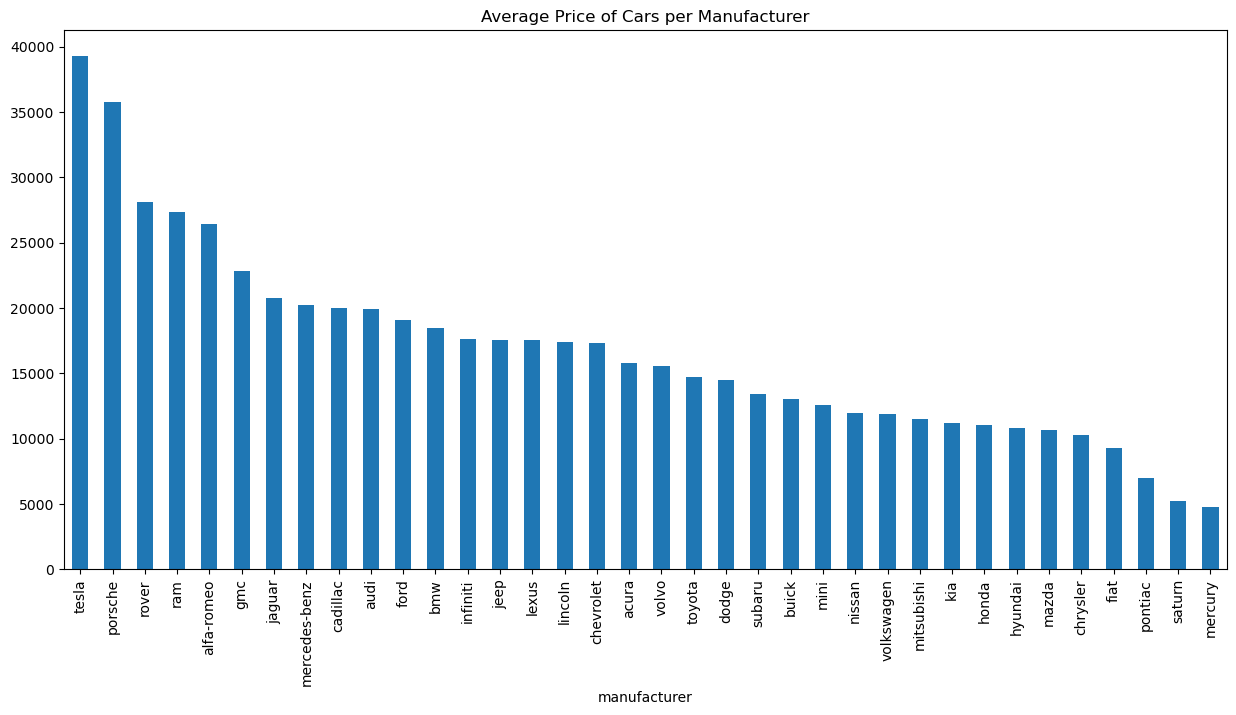

In [19]:
# 1. EDA specific to Manufacturers

# Count of unique manufacturers
print("Number of unique manufacturers:", vehicles['manufacturer'].nunique())

# Distribution of cars per manufacturer
manufacturers_dist = vehicles['manufacturer'].value_counts()
print(manufacturers_dist)
manufacturers_dist.plot(kind='bar', figsize=(15,7), title="Distribution of Cars per Manufacturer")

# Average price of cars per manufacturer
avg_price_per_manufacturer = vehicles.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
print(avg_price_per_manufacturer)
avg_price_per_manufacturer.plot(kind='bar', figsize=(15,7), title="Average Price of Cars per Manufacturer")


In [21]:
vehicles['condition'].fillna('good', inplace=True)
# Sorting the dataset by 'price' in descending order
highest_priced_rows = vehicles.sort_values(by='price', ascending=False)

# Displaying the top rows with the highest prices
print(highest_priced_rows.head())



               region   price    year   manufacturer  \
324462       portland  239900  2018.0        porsche   
127596         hawaii  225995  2016.0        porsche   
181026      baltimore  209995  2020.0  mercedes-benz   
93202   daytona beach  199999  2017.0  mercedes-benz   
199310          flint  195000  2014.0       cadillac   

                           model  condition   fuel  odometer title_status  \
324462           911 gt3 touring       good  other    4224.0        clean   
127596                       911       good    gas     159.0        clean   
181026  mercedes-maybach s-class       good    gas     750.0        clean   
93202                    g-class  excellent    gas   15189.0        clean   
199310            srx awd luxury   like new    gas   47814.0        clean   

       transmission drive   type state  car_age  
324462       manual   rwd  other    or      5.0  
127596        other   rwd  coupe    hi      7.0  
181026    automatic   rwd  sedan    md      3.0  


In [22]:
# Drop rows based on conditions for 'manufacturer' and 'price'
vehicles = vehicles[~((vehicles['manufacturer'] == 'jeep') & (vehicles['price'] > 70000))]

# Checking the shape of the modified dataset to see how many rows remain
print(vehicles.shape)


(92818, 14)


In [23]:
# Drop rows where 'model' contains the string 'custom'
vehicles = vehicles[~vehicles['model'].str.contains('custom', case=False, na=False)]

# Checking the shape of the modified dataset to see how many rows remain
print(vehicles.shape)


(92778, 14)


In [24]:
model_counts = vehicles['model'].value_counts()


In [25]:
# Preprocess model names
vehicles['model_clean'] = vehicles['model'].str.lower()
vehicles['model_clean'] = vehicles['model_clean'].str.replace('[^a-z]', '')  # Keep only alphabets
vehicles['model_clean'] = vehicles['model_clean'].str.strip()

# Group by exact matches after preprocessing
model_counts_clean = vehicles['model_clean'].value_counts()
frequent_models_clean = model_counts_clean[model_counts_clean > 4].index.tolist()

# Map original model names to their cleaned version if they are frequent, otherwise mark as 'other'
vehicles['model_grouped'] = vehicles['model_clean'].apply(lambda x: x if x in frequent_models_clean else 'other')


In [26]:
threshold = 50
frequent_models = model_counts[model_counts >= threshold].index.tolist()

# Group models that appear less than the threshold times under "other"
vehicles['model_grouped'] = vehicles['model'].where(vehicles['model'].isin(frequent_models), 'other')

# Check the distribution again
model_grouped_counts = vehicles['model_grouped'].value_counts()
print(model_grouped_counts)


model_grouped
other             40965
f-150              2151
silverado 1500     1235
1500               1118
camry               850
                  ...  
cc                   50
sedona               50
sebring              50
volt                 50
elantra se           50
Name: count, Length: 261, dtype: int64


In [27]:
vehicles['model_grouped'] = vehicles['model_grouped'].replace('1500', 'silverado 1500')


In [36]:
vehicles['model_grouped'].value_counts().head(50)


other                 40965
silverado 1500         2353
f-150                  2151
camry                   850
escape                  840
civic                   773
grand cherokee          753
altima                  714
accord                  712
explorer                698
cr-v                    633
silverado               625
fusion                  622
wrangler                621
tacoma                  620
corolla                 606
equinox                 570
rav4                    560
2500                    531
focus                   525
mustang                 513
sonata                  490
cruze                   470
edge                    460
elantra                 448
malibu                  442
rogue                   439
sierra 1500             438
outback                 430
jetta                   418
tahoe                   402
tundra                  395
f-250                   386
forester                385
odyssey                 383
sentra              

In [28]:
other_vehicles_by_manufacturer = vehicles[vehicles['model_grouped'] == 'other']['manufacturer'].value_counts()
print(other_vehicles_by_manufacturer)


manufacturer
ford             5334
chevrolet        3697
toyota           3143
bmw              2294
nissan           1930
mercedes-benz    1884
honda            1740
gmc              1507
jeep             1428
ram              1419
lexus            1390
volkswagen       1207
subaru           1198
dodge            1194
hyundai          1116
audi             1113
kia              1049
infiniti          939
cadillac          849
mazda             766
buick             705
acura             583
chrysler          540
mini              512
lincoln           495
volvo             486
mitsubishi        478
rover             354
jaguar            302
pontiac           293
porsche           287
mercury           197
tesla             152
saturn            142
alfa-romeo        141
fiat              101
Name: count, dtype: int64


In [29]:
from collections import Counter
import re

# Get all model names for vehicles labeled "other"
other_models = vehicles[vehicles['model_grouped'] == 'other']['model'].tolist()

# Tokenize the model names
tokens = [word for model_name in other_models for word in re.split(r'\W+', str(model_name))]

# Count the frequency of each token
token_counts = Counter(tokens)

# Display the most common tokens
print(token_counts.most_common(20))


[('sport', 4174), ('4d', 3435), ('sedan', 2858), ('4x4', 1856), ('1500', 1773), ('2', 1754), ('cab', 1685), ('limited', 1452), ('s', 1445), ('utility', 1425), ('premium', 1401), ('awd', 1350), ('se', 1233), ('f', 1108), ('3', 973), ('silverado', 961), ('crew', 876), ('5', 841), ('series', 822), ('xlt', 808)]


In [30]:
# For example, for Ford:
ford_other_models = vehicles[(vehicles['model_grouped'] == 'other') & (vehicles['manufacturer'] == 'ford')]['model'].value_counts()
print(ford_other_models)


model
escape xlt                            49
f150 xlt                              49
explorer sport trac                   48
f250 super duty crew cab              46
f350 super duty crew cab              43
                                      ..
escape fwd 4dr titanium                1
super duty f-350 drw xl/boom truck     1
f-150 2wd super cab xl/                1
explorer 4wd 4dr/46 km                 1
f150, platinum                         1
Name: count, Length: 1696, dtype: int64


In [32]:
ford_model_mapping = {
    'escape': 'escape',
    'f150': 'f-150',
    'explorer': 'explorer',
    'f250': 'f-250',
    'f350': 'f-350',
    # ... Add other base models as necessary
}

def map_ford_models(model_name):
    for key, value in ford_model_mapping.items():
        if key in str(model_name).lower():
            return value
    return model_name

vehicles['model'] = vehicles.apply(lambda x: map_ford_models(x['model']) if x['manufacturer'] == 'ford' else x['model'], axis=1)


In [38]:
vehicles_cleaned = vehicles[vehicles['model_grouped'] != 'other']


In [39]:
vehicles_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51813 entries, 28 to 426737
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         51813 non-null  object 
 1   price          51813 non-null  int64  
 2   year           51813 non-null  float64
 3   manufacturer   51813 non-null  object 
 4   model          51813 non-null  object 
 5   condition      51813 non-null  object 
 6   fuel           51813 non-null  object 
 7   odometer       51813 non-null  float64
 8   title_status   51813 non-null  object 
 9   transmission   51813 non-null  object 
 10  drive          51813 non-null  object 
 11  type           51813 non-null  object 
 12  state          51813 non-null  object 
 13  car_age        51813 non-null  float64
 14  model_clean    51813 non-null  object 
 15  model_grouped  51813 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 6.7+ MB


In [40]:
vehicles_cleaned = vehicles_cleaned.copy()
vehicles_cleaned.drop(columns=['model', 'region', 'model_clean'], inplace=True)


In [67]:
# Create a copy of the DataFrame
vehicles_cleaned = vehicles_cleaned.copy()

# Apply the filter for prices greater than 500
vehicles_cleaned = vehicles_cleaned[vehicles_cleaned['price'] > 500]




In [68]:
cols_to_check = ['condition', 'fuel', 'title_status', 'transmission', 'drive', 'type']

for col in cols_to_check:
    print(f"{col}: {vehicles_cleaned[col].unique()}\n")


condition: [2 3 4 1 5 0]

fuel: ['gas' 'other' 'hybrid' 'diesel' 'electric']

title_status: [5 4 2 3 1 0]

transmission: ['other' 'automatic' 'manual']

drive: ['rwd' '4wd' 'fwd']

type: ['pickup' 'other' 'SUV' 'coupe' 'sedan' 'hatchback' 'truck' 'wagon' 'van'
 'convertible' 'mini-van' 'offroad' 'bus']



In [69]:
ordinal_mappings = {
    'condition': {
        'salvage': 0,
        'fair': 1,
        'good': 2,
        'excellent': 3,
        'like new': 4,
        'new': 5
    },
    'transmission':{
        'other': 1,
        'automatic': 2,
        'manual': 0
    },
    'drive':{
        'fwd': 1,
        'rwd': 1,
        '4wd': 2,
    },
    'title_status': {
        'parts only': 0,
        'missing': 1,
        'salvage': 2,
        'lien': 3,
        'rebuilt': 4,
        'clean': 5
    },

}

# Applying ordinal mapping
for column, mapping in ordinal_mappings.items():
    vehicles_cleaned[column] = vehicles_cleaned[column].map(mapping)


In [70]:
vehicles_encoded = pd.get_dummies(vehicles_cleaned, columns=['manufacturer', 'fuel', 'state', 'type', 'model_grouped'])


In [71]:
vehicles_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44642 entries, 28 to 426737
Columns: 369 entries, price to model_grouped_yukon xl
dtypes: bool(361), float64(5), int64(3)
memory usage: 18.4 MB


In [75]:
# Check for NaN values in each column
print(vehicles_encoded.isna().sum())


price                             0
year                              0
condition                     44642
odometer                          0
title_status                  44642
                              ...  
model_grouped_xts                 0
model_grouped_yaris               0
model_grouped_yukon               0
model_grouped_yukon denali        0
model_grouped_yukon xl            0
Length: 369, dtype: int64


In [76]:
# Fill NaN values in 'condition' with 2 and 'title_status' with 5
vehicles_encoded['condition'].fillna(2, inplace=True)
vehicles_encoded['title_status'].fillna(5, inplace=True)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [77]:
# test train split the vehicle encoded dataset
from sklearn.model_selection import train_test_split

X = vehicles_encoded.drop('price', axis=1)
y = vehicles_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#created a function to display all the metrics I want to compare
def display_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False) # squared=False gives RMSE
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")


In [79]:
from sklearn.linear_model import LinearRegression

# Linear Regression model to start
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_preds = lin_reg.predict(X_test)

print("Linear Regression Metrics:")
display_metrics(y_test, lin_reg_preds)


Linear Regression Metrics:
Mean Squared Error (MSE): 71650204.98086838
Mean Absolute Error (MAE): 4036.4780770523016
R^2 Score: 0.5580593081098308
Root Mean Squared Error (RMSE): 8464.644409593848


In [80]:
from sklearn.linear_model import LassoCV
#Lasso regression
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression Metrics:")
display_metrics(y_test, y_pred_lasso)



Lasso Regression Metrics:
Mean Squared Error (MSE): 226054719.89175013
Mean Absolute Error (MAE): 8226.178904497372
R^2 Score: -0.39431254021776896
Root Mean Squared Error (RMSE): 15035.116224750314


In [81]:
from sklearn.linear_model import RidgeCV
# Ridge regression
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression Metrics:")
display_metrics(y_test, y_pred_ridge)



Ridge Regression Metrics:
Mean Squared Error (MSE): 71800429.41739227
Mean Absolute Error (MAE): 4037.4554125120394
R^2 Score: 0.5571327191149507
Root Mean Squared Error (RMSE): 8473.513404567922


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Optimized random forest with gridsearch CV because RandomForest was the best performer
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# n_jobs = -1 will eat up most of your CPU but I needed it to get this done faster, use at your own discretion or remove just the n_jobs line
rf = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred_rf = grid_search.best_estimator_.predict(X_test)

print("Random Forest Metrics:")
display_metrics(y_test, y_pred_rf)



Random Forest Metrics:
Mean Squared Error (MSE): 28748816.022772335
Mean Absolute Error (MAE): 3065.0940752772754
R^2 Score: 0.8226764042344913
Root Mean Squared Error (RMSE): 5361.792239799332


In [82]:
from keras.models import Sequential
from keras.layers import Dense
# First attempt at neural network, have to convert to floats to avoid an error
# Convert data to float32 type
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

y_pred_nn = model.predict(X_test).flatten()  # flatten predictions to match y_test's shape

print("Neural Network Metrics:")
display_metrics(y_test, y_pred_nn)



Epoch 1/10
1005/1005 [==============================] - 3s 2ms/step - loss: 156399296.0000 - val_loss: 120479552.0000
Epoch 2/10
1005/1005 [==============================] - 2s 2ms/step - loss: 121711056.0000 - val_loss: 118857744.0000
Epoch 3/10
1005/1005 [==============================] - 2s 2ms/step - loss: 119685488.0000 - val_loss: 119969688.0000
Epoch 4/10
1005/1005 [==============================] - 2s 2ms/step - loss: 117257800.0000 - val_loss: 119300240.0000
Epoch 5/10
1005/1005 [==============================] - 2s 2ms/step - loss: 116484088.0000 - val_loss: 120543408.0000
Epoch 6/10
1005/1005 [==============================] - 2s 2ms/step - loss: 114191856.0000 - val_loss: 110937424.0000
Epoch 7/10
1005/1005 [==============================] - 2s 2ms/step - loss: 111506856.0000 - val_loss: 111597600.0000
Epoch 8/10
1005/1005 [==============================] - 2s 2ms/step - loss: 108285952.0000 - val_loss: 101584952.0000
Epoch 9/10
1005/1005 [==============================] - 

In [83]:
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
#Optimized Neural Network
# Normalize features
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_norm.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_norm, y_train, epochs=50, batch_size=32, validation_split=0.1)  # increased epochs

y_pred_nn = model.predict(X_test_norm).flatten()

print("Neural Network Metrics:")
display_metrics(y_test, y_pred_nn)


Epoch 1/50
1005/1005 [==============================] - 3s 3ms/step - loss: 123971968.0000 - val_loss: 41205600.0000
Epoch 2/50
1005/1005 [==============================] - 2s 2ms/step - loss: 42043812.0000 - val_loss: 33057390.0000
Epoch 3/50
1005/1005 [==============================] - 4s 4ms/step - loss: 37691612.0000 - val_loss: 29569716.0000
Epoch 4/50
1005/1005 [==============================] - 2s 2ms/step - loss: 35410520.0000 - val_loss: 28043012.0000
Epoch 5/50
1005/1005 [==============================] - 3s 3ms/step - loss: 33843948.0000 - val_loss: 27439790.0000
Epoch 6/50
1005/1005 [==============================] - 3s 3ms/step - loss: 33293590.0000 - val_loss: 26898758.0000
Epoch 7/50
1005/1005 [==============================] - 3s 3ms/step - loss: 32949508.0000 - val_loss: 27667030.0000
Epoch 8/50
1005/1005 [==============================] - 3s 3ms/step - loss: 32634374.0000 - val_loss: 26164516.0000
Epoch 9/50
1005/1005 [==============================] - 2s 2ms/step - l

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#The best-performing model was the neural network with the following metrics:

Neural Network Metrics:
Mean Squared Error (MSE): 24856168.0
Mean Absolute Error (MAE): 2878.360595703125
R^2 Score: 0.8466863789627694
Root Mean Squared Error (RMSE): 4985.59619140625
The R2 score of 0.626 indicates that approximately 84.7% of the variance in the used car prices is explained by the model. This is a relatively strong fit and took a lot of attempts and re-working the data preperation.

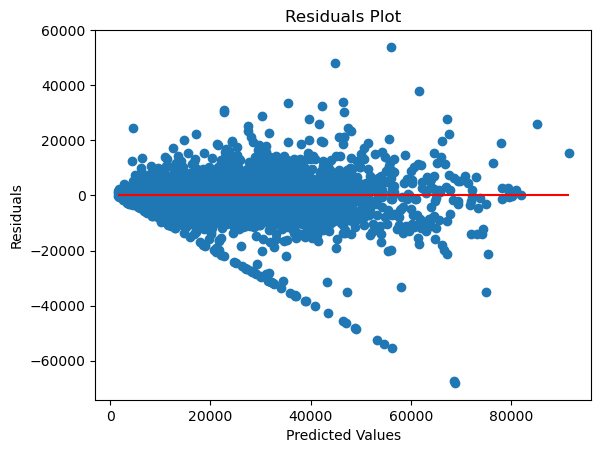

In [86]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_nn
plt.scatter(y_pred_nn, residuals)
plt.hlines(y=0, xmin=y_pred_nn.min(), xmax=y_pred_nn.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


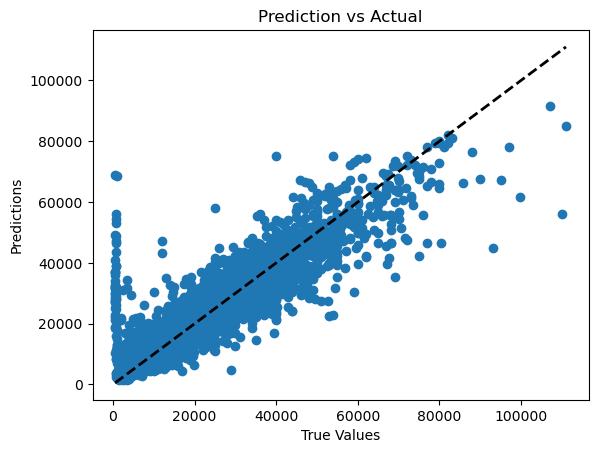

In [87]:
plt.scatter(y_test, y_pred_nn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction vs Actual')
plt.show()


Epoch 1/50
1005/1005 [==============================] - 2s 2ms/step - loss: 24994060.0000 - val_loss: 23409578.0000
Epoch 2/50
1005/1005 [==============================] - 2s 2ms/step - loss: 24912830.0000 - val_loss: 23459886.0000
Epoch 3/50
1005/1005 [==============================] - 2s 2ms/step - loss: 25029038.0000 - val_loss: 23687716.0000
Epoch 4/50
1005/1005 [==============================] - 3s 3ms/step - loss: 25182606.0000 - val_loss: 24025248.0000
Epoch 5/50
1005/1005 [==============================] - 3s 3ms/step - loss: 24622760.0000 - val_loss: 23495166.0000
Epoch 6/50
1005/1005 [==============================] - 2s 2ms/step - loss: 24479978.0000 - val_loss: 23636140.0000
Epoch 7/50
1005/1005 [==============================] - 3s 3ms/step - loss: 24775010.0000 - val_loss: 23373538.0000
Epoch 8/50
1005/1005 [==============================] - 3s 3ms/step - loss: 24698630.0000 - val_loss: 23748418.0000
Epoch 9/50
1005/1005 [==============================] - 2s 2ms/step - lo

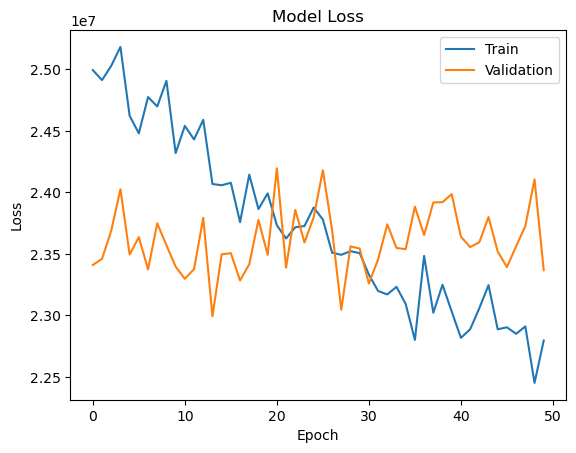

In [88]:
history = model.fit(X_train_norm, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


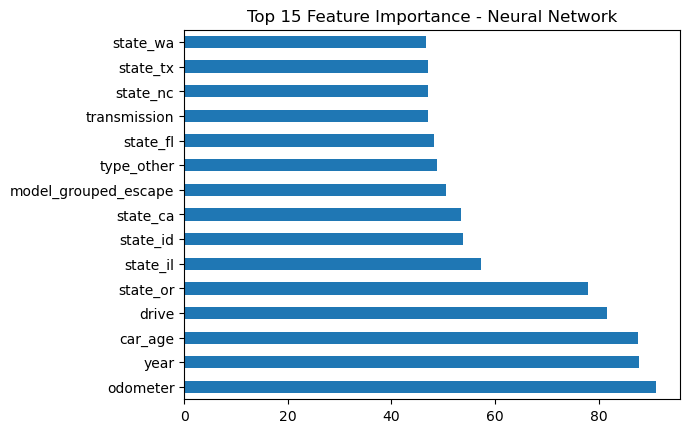

In [96]:
# Sort and limit to top 15 features
top_15_features_nn = feature_importance_nn.sort_values(ascending=False).head(15)

# Plot
top_15_features_nn.plot(kind='barh')
plt.title('Top 15 Feature Importance - Neural Network')
plt.show()


The optimized RandomForest was also a highly effective model

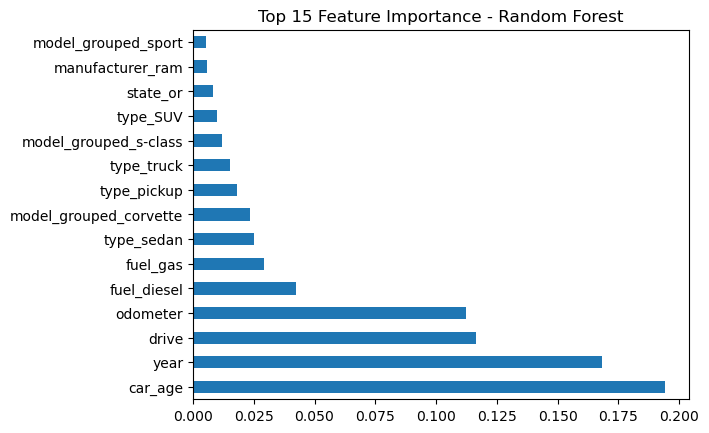

In [95]:
# Sort and limit to top 10 features
top_15_features_rf = feature_importance_rf.sort_values(ascending=False).head(15)

# Plot
top_15_features_rf.plot(kind='barh')
plt.title('Top 15 Feature Importance - Random Forest')
plt.show()


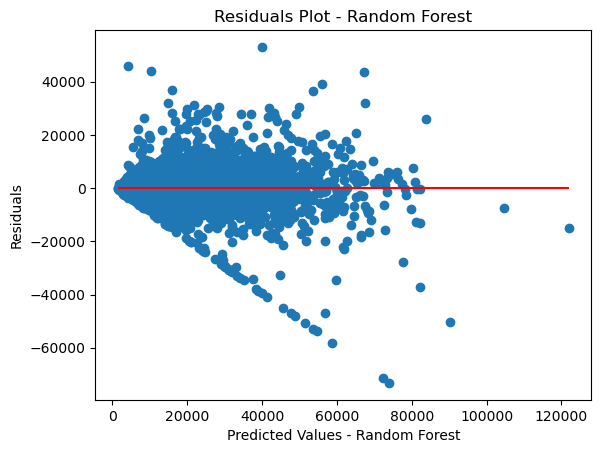

In [91]:
# Residuals plot for Random Forest
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf)
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), colors='red')
plt.xlabel('Predicted Values - Random Forest')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Random Forest')
plt.show()


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

I have developed two models: a Neural Network and a Random Forest model to predict used car prices with an accuracy of R2 = 0.847 and R2 = 0.823
 respectively. These models can help you make informed decisions about inventory and pricing.

Key Findings
High Accuracy: Our Neural Network model has an 
R2 score of 0.847, while the Random Forest model scores 0.823.

Neural Network Feature Importance:

Odometer: The number of miles a car has traveled significantly influences its price.
Year/Car Age: The age of the car is another major determinant.
Drive (4WD): Cars with 4-wheel drive generally hold higher value.
Transmission: A preference for automatic transmission affects car prices.
Regional Impact: The value of a car appears to vary by region.

Residuals Analysis: While the residuals for both models are generally well-distributed, there's a noticeable downward trend, indicating that our models tend to overestimate car prices as they increase. This suggests there may be additional factors or non-linear relationships not yet accounted for.

Recommendations
Further Analysis: Investigate other potential factors or features that may capture the nonlinear aspects of car pricing. These could include interaction terms, polynomial features, or other domain-specific variables.

Segmentation: Consider building different models for different price ranges or car types to better capture these nuances.

Complex Models: To capture non-linearity, more complex models or ensembles can be explored.

In [98]:
mask_ford = X_test['manufacturer_ford'] == 1  # Assuming 'manufacturer_ford' is the relevant column name
X_test_ford = X_test[mask_ford]
y_test_ford = y_test[mask_ford]


In [99]:
# First, normalize the Ford instances
X_test_ford_norm = scaler.transform(X_test_ford)

# Then, predict
y_pred_ford = model.predict(X_test_ford_norm).flatten()


51/51 [==============================] - 0s 2ms/step


In [100]:
residuals_ford = y_test_ford - y_pred_ford


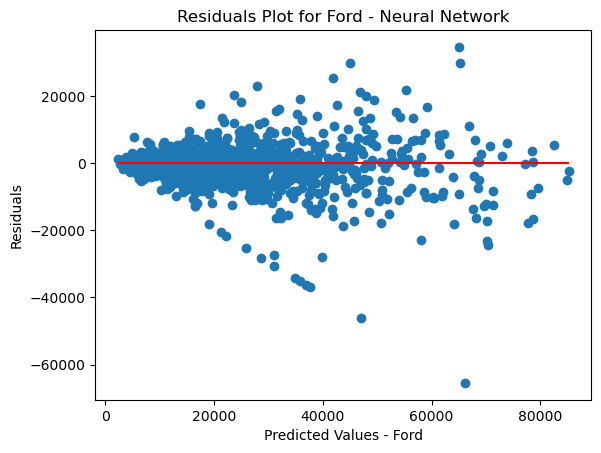

In [101]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_ford, residuals_ford)
plt.hlines(y=0, xmin=y_pred_ford.min(), xmax=y_pred_ford.max(), colors='red')
plt.xlabel('Predicted Values - Ford')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Ford - Neural Network')
plt.show()


In [104]:
mask_mercedes = X_test['manufacturer_mercedes-benz'] == 1  # Assuming 'manufacturer_mercedes-benz' is the relevant column name
X_test_mercedes = X_test[mask_mercedes]
y_test_mercedes = y_test[mask_mercedes]



In [105]:
# First, normalize the Mercedes-Benz instances
X_test_mercedes_norm = scaler.transform(X_test_mercedes)

# Then, predict
y_pred_mercedes = model.predict(X_test_mercedes_norm).flatten()


6/6 [==============================] - 0s 2ms/step


In [106]:
residuals_mercedes = y_test_mercedes - y_pred_mercedes


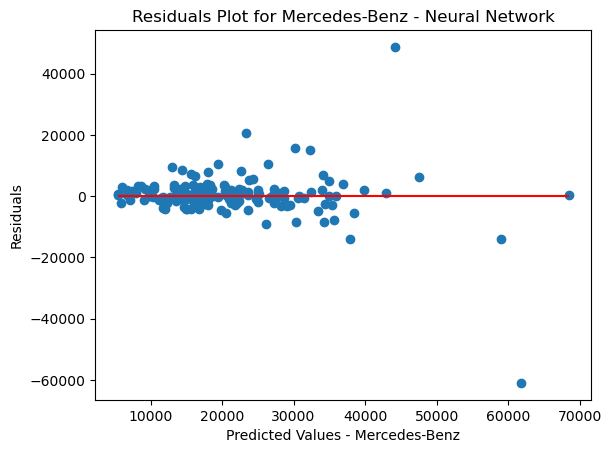

In [107]:
plt.scatter(y_pred_mercedes, residuals_mercedes)
plt.hlines(y=0, xmin=y_pred_mercedes.min(), xmax=y_pred_mercedes.max(), colors='red')
plt.xlabel('Predicted Values - Mercedes-Benz')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Mercedes-Benz - Neural Network')
plt.show()


In [108]:
mask_chevrolet = X_test['manufacturer_chevrolet'] == 1
X_test_chevrolet = X_test[mask_chevrolet]
y_test_chevrolet = y_test[mask_chevrolet]


In [109]:
# Normalize Chevrolet instances
X_test_chevrolet_norm = scaler.transform(X_test_chevrolet)

# Predict
y_pred_chevrolet = model.predict(X_test_chevrolet_norm).flatten()


42/42 [==============================] - 0s 2ms/step


In [110]:
residuals_chevrolet = y_test_chevrolet - y_pred_chevrolet


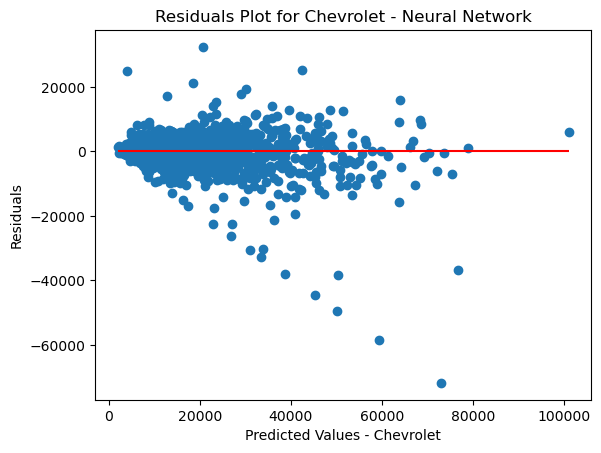

In [111]:
plt.scatter(y_pred_chevrolet, residuals_chevrolet)
plt.hlines(y=0, xmin=y_pred_chevrolet.min(), xmax=y_pred_chevrolet.max(), colors='red')
plt.xlabel('Predicted Values - Chevrolet')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Chevrolet - Neural Network')
plt.show()


In [112]:
mask_toyota = X_test['manufacturer_toyota'] == 1
X_test_toyota = X_test[mask_toyota]
y_test_toyota = y_test[mask_toyota]


In [113]:
# Normalize Toyota instances
X_test_toyota_norm = scaler.transform(X_test_toyota)

# Predict
y_pred_toyota = model.predict(X_test_toyota_norm).flatten()


28/28 [==============================] - 0s 2ms/step


In [114]:
residuals_toyota = y_test_toyota - y_pred_toyota


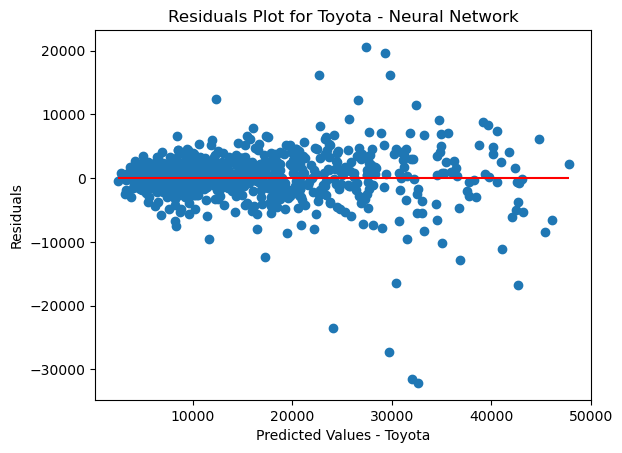

In [115]:
plt.scatter(y_pred_toyota, residuals_toyota)
plt.hlines(y=0, xmin=y_pred_toyota.min(), xmax=y_pred_toyota.max(), colors='red')
plt.xlabel('Predicted Values - Toyota')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Toyota - Neural Network')
plt.show()
